In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import seaborn as sns
import scipy as sp
#plt.style.use('notestyle')

In [2]:
def f(x):
    return np.sin(2*np.pi*x)

In [4]:
ngrid=101
xg = np.linspace(0,1,num=ngrid)
print(xg, type(xg))

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ] <class 'numpy.ndarray'>


In [5]:
def basisf(j,x):
    return x**j

In [6]:
def fitf(x):
    return sum([w[j]*basisf(j,x) for j in range(M)])

In [13]:
def initwithoutnoise():
    global N
    global xp
    global tp
    N = 10
    np.random.seed(seed=54)
    xp = np.sort(np.random.random_sample(N))
    print(xp, type(xp))
    tp = f(xp)

In [14]:
initwithoutnoise()
print(tabulate(zip(range(N),xp, tp)))

[0.00860545 0.02965701 0.18487669 0.3632395  0.42018297 0.51828273
 0.6714843  0.75731199 0.80138126 0.96893621] <class 'numpy.ndarray'>
-  ----------  ----------
0  0.00860545   0.0540433
1  0.029657     0.185264
2  0.184877     0.917447
3  0.363239     0.75738
4  0.420183     0.480746
5  0.518283    -0.114621
6  0.671484    -0.880761
7  0.757312    -0.998945
8  0.801381    -0.948339
9  0.968936    -0.193943
-  ----------  ----------


In [15]:
def initwithnoise():
    global N
    global xp
    global tp
    global sigma
    N = 10
    np.random.seed(seed=54)
    xp = np.sort(np.random.random_sample(N))
    np.random.seed(seed=58)
    sigma = 0.1
    print(np.random.normal(0,sigma,N), type(np.random.normal(0,sigma,N)))
    tp = f(xp) + np.random.normal(0,sigma,N)

In [16]:
initwithnoise()
print(tabulate(zip(xp,tp)))

[-0.07601861 -0.2101584  -0.08097567 -0.00075173 -0.17043608  0.0581404
 -0.09691441 -0.14809011 -0.05233425  0.12670646] <class 'numpy.ndarray'>
----------  -----------
0.00860545  -0.00698173
0.029657     0.2221
0.184877     0.756122
0.363239     0.767394
0.420183     0.247999
0.518283    -0.104539
0.671484    -0.991312
0.757312    -1.18881
0.801381    -0.764474
0.968936    -0.0489486
----------  -----------


[0.00860545 0.02965701 0.18487669 0.3632395  0.42018297 0.51828273
 0.6714843  0.75731199 0.80138126 0.96893621] <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


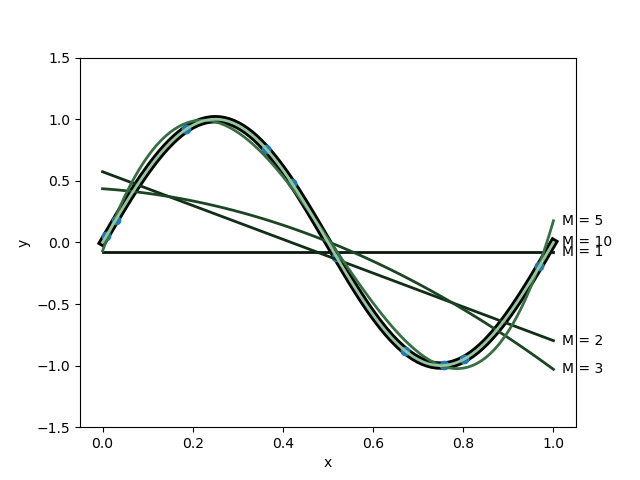

(-1.5, 1.5)

In [23]:
initwithoutnoise()
cmap = sns.cubehelix_palette(N+1, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.figure()
plt.plot(xg, f(xg),color=cmap[0],lw=6)
plt.plot(xp,tp,'o')  #create small circles
plt.xlabel('x')
plt.ylabel('y')
Mmax = N
for M in [1,2, 3,5,10]: #range(1,Mmax+1):
    def basisf(j,x):
        return x**j

    def fitf(x):
        return sum([w[j]*basisf(j,x) for j in range(M)])

    phi = np.zeros((N,M))
    for n, x in enumerate(xp):
        for j in range(M):
            phi[n,j] = basisf(j,x)

#    omega = np.linalg.inv(phi.transpose() @ phi)

#    w = np.dot(omega, np.dot(phi.transpose(),tp))
    phit = phi.transpose()
    w = np.linalg.solve(np.dot(phit,phi), np.dot(phit,tp))
    plt.plot(xg, fitf(xg), color=cmap[M], lw=2)
#   plt.plot(xg, fitf(xg), lw=2)
    plt.text(1.02,min(max(fitf(1),-1.5),1.5),f'M = {M}',va='center')
plt.ylim(-1.5,1.5)
#plt.savefig('poly.pdf')
#print(phi)

In [26]:
phi = np.zeros((3,9))
print(phi, phi.shape)
for j in range(10):
    print(j)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]] (3, 9)
0
1
2
3
4
5
6
7
8
9


[-0.07601861 -0.2101584  -0.08097567 -0.00075173 -0.17043608  0.0581404
 -0.09691441 -0.14809011 -0.05233425  0.12670646] <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


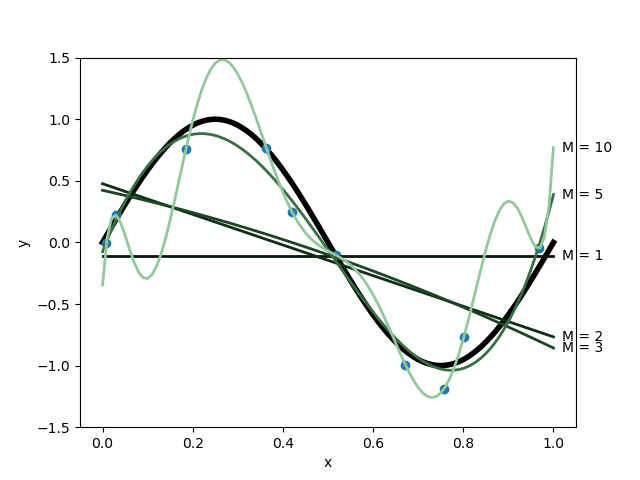

(-1.5, 1.5)

In [27]:
initwithnoise()
cmap = sns.cubehelix_palette(N+1, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.figure()
plt.plot(xg, f(xg),color=cmap[0],lw=4)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')
Mmax = N
for M in [1, 2, 3, 5,10]: #range(1,Mmax+1):
    def basisf(j,x):
        return x**j

    def fitf(x):
        return sum([w[j]*basisf(j,x) for j in range(M)])

    phi = np.zeros((N,M))
    for n, x in enumerate(xp):
        for j in range(M):
            phi[n,j] = basisf(j,x)

#    omega = np.linalg.inv(phi.transpose() @ phi)

#    w = np.dot(omega, np.dot(phi.transpose(),tp))
    phit = phi.transpose()
    w = np.linalg.solve(np.dot(phit,phi), np.dot(phit,tp))    
    plt.plot(xg, fitf(xg), color=cmap[M], lw=2)
#   plt.plot(xg, fitf(xg), lw=2)
    plt.text(1.02,min(max(fitf(1),-1.5),1.5),f'M = {M}',va='center')
plt.ylim(-1.5,1.5)
#plt.savefig('poly_noise.pdf')

In [28]:
w

array([-3.44691379e-01,  5.08516522e+01, -1.48240360e+03,  1.62172955e+04,
       -8.51684420e+04,  2.46950143e+05, -4.18495880e+05,  4.13045694e+05,
       -2.19947738e+05,  4.88315936e+04])

In [29]:
w[-1]*9*8*7*6*5*4*3*2

17720008667.576965

### Regularization

[-0.07601861 -0.2101584  -0.08097567 -0.00075173 -0.17043608  0.0581404
 -0.09691441 -0.14809011 -0.05233425  0.12670646] <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


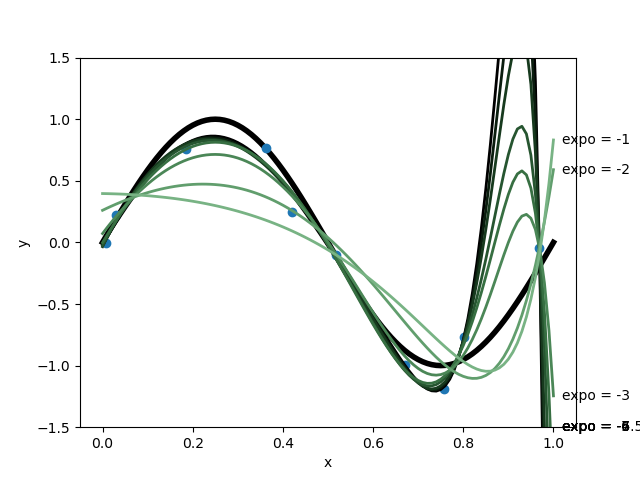

In [30]:
initwithnoise()
M = 2*N
expos = [-7,-6.5,-6,-5,-4,-3,-2,-1]

cmap = sns.cubehelix_palette(len(expos)+1, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.figure()
plt.plot(xg, f(xg),color=cmap[0],lw=4)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

quali = []

for i,expo in enumerate(expos):
    lamb = 10**expo
    def basisf(j,x):
        return x**j

    def fitf(x):
        return sum([w[j]*basisf(j,x) for j in range(M)])

    phi = np.zeros((N,M))
    for n, x in enumerate(xp):
        for j in range(M):
            phi[n,j] = basisf(j,x)

    omegatilde = np.linalg.inv(phi.transpose() @ phi + lamb*np.identity(M))

    w = np.dot(omegatilde, np.dot(phi.transpose(),tp))
    quali.append(sum((fitf(xg)-f(xg))**2)/len(xg))
    plt.plot(xg, fitf(xg), color=cmap[i], lw=2)
#   plt.plot(xg, fitf(xg), lw=2)
    plt.text(1.02,min(max(fitf(1),-1.5),1.5),f'expo = {expo}',va='center')
    plt.ylim(-1.5,1.5)

In [31]:
quali

[2.338944261424472,
 1.4130608570927643,
 0.8251281161115734,
 0.3090222063705926,
 0.15861066785470615,
 0.07034057947624608,
 0.08566805755025896,
 0.15414078212076418]

<IPython.core.display.Javascript object>


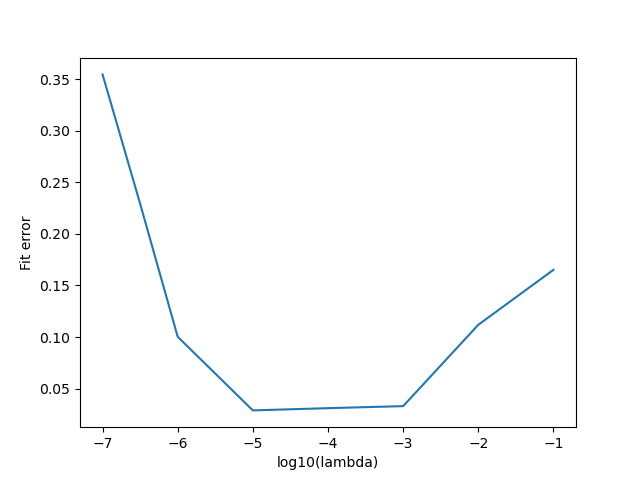

In [27]:
plt.figure()
plt.xlabel('log10(lambda)')
plt.ylabel('Fit error')
plt.plot(expos,quali)
#plt.savefig('regul.pdf')

### Probability distributions - plotting an ensemble

[-0.07601861 -0.2101584  -0.08097567 -0.00075173 -0.17043608  0.0581404
 -0.09691441 -0.14809011 -0.05233425  0.12670646] <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


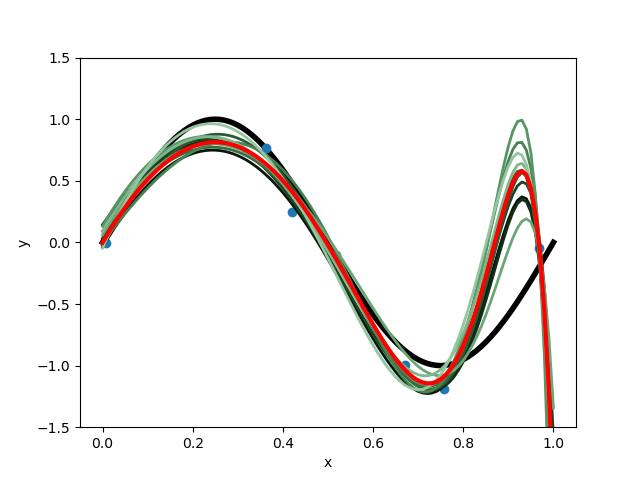

(-1.5, 1.5)

In [36]:
initwithnoise()
M = 2*N
expo = -4
lamb = 10**expo
Nens = 10

plt.figure()
cmap = sns.cubehelix_palette(Nens+1, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.plot(xg, f(xg),color=cmap[0],lw=4)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

quali = []

def basisf(j,x):
    return x**j

def fitf(x):
    return sum([w[j]*basisf(j,x) for j in range(M)])

phi = np.zeros((N,M))
for n, x in enumerate(xp):
    for j in range(M):
        phi[n,j] = basisf(j,x)

phit = phi.transpose()

omegatilde = np.linalg.inv(phi.transpose() @ phi + lamb*np.identity(M))

w0 = np.dot(omegatilde, np.dot(phi.transpose(),tp))

w=w0

omega = sigma**2*omegatilde

for i in range(Nens):
    w=np.random.multivariate_normal(w0,omega)
    plt.plot(xg, fitf(xg), color = cmap[i+1],lw=2)
w=w0
plt.plot(xg, fitf(xg), color='r', lw=3)
#    plt.text(1.02,min(max(fitf(1),-1.5),1.5),f'expo = {expo}',va='center')
plt.ylim(-1.5,1.5)
#plt.savefig('ensemble.pdf')

### Plotting the error bar

<IPython.core.display.Javascript object>


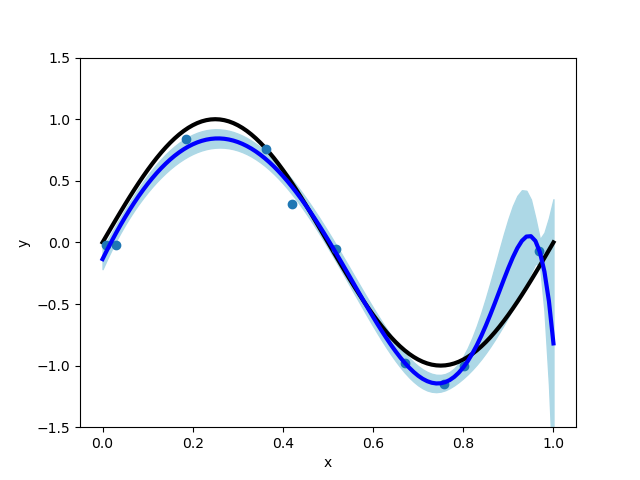

(-1.5, 1.5)

In [29]:
initwithnoise()
M = 2*N
expo = -4
lamb = 10**expo

plt.figure()
cmap = sns.cubehelix_palette(Nens+1, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.plot(xg, f(xg),color=cmap[0],lw=3)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

delomeg = np.identity(M)

quali = []

def basisf(j,x):
    return x**j

def fitf(x):
    return sum([w[j]*basisf(j,x) for j in range(M)])

phi = np.zeros((N,M))
for n, x in enumerate(xp):
    for j in range(M):
        phi[n,j] = basisf(j,x)

omegatilde = np.linalg.inv(phi.transpose() @ phi + lamb*np.identity(M))
omega = sigma**2*omegatilde

w0 = np.dot(omegatilde, np.dot(phi.transpose(),tp))

width =[]

for x in xg:
    phivec = np.asarray([basisf(j,x) for j in range(M)])
    width.append(np.sqrt(np.dot(np.dot(phivec,omega),phivec)))

width = np.asarray(width)

w=w0
plt.plot(xg, fitf(xg), color='b', lw=3)
plt.fill_between(xg, fitf(xg)-width, fitf(xg)+width, color='lightblue')

plt.ylim(-1.5,1.5)
#plt.savefig('errorbar.pdf')

### The prior distribution

<IPython.core.display.Javascript object>


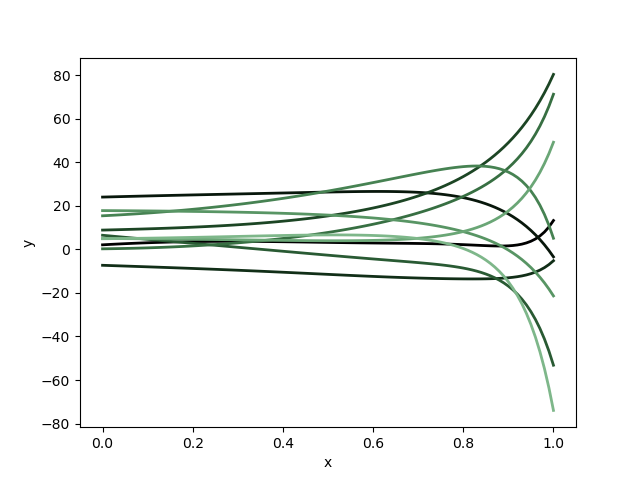

In [30]:
initwithnoise()
M = 2*N
expo = -4
lamb = 10**expo
Nens = 10

lambtilde = lamb/sigma**2

plt.figure()
cmap = sns.cubehelix_palette(Nens+1, start=2, rot=0, dark=0, light=.7, reverse=True)
#plt.plot(xg, f(xg),color=cmap[0],lw=4)
#plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

quali = []

def basisf(j,x):
    return x**j

def fitf(x):
    return sum([w[j]*basisf(j,x) for j in range(M)])

phi = np.zeros((N,M))
for n, x in enumerate(xp):
    for j in range(M):
        phi[n,j] = basisf(j,x)

phit = phi.transpose()
np.random.seed(seed=53)
for i in range(Nens):
    w=np.random.multivariate_normal(np.zeros(M),np.identity(M)/lambtilde)
    plt.plot(xg, fitf(xg), color=cmap[i], lw=2)
#    plt.text(1.02,min(max(fitf(1),-1.5),1.5),f'expo = {expo}',va='center')
#plt.ylim(-1.5,1.5)
#plt.savefig('prior_ensemble.pdf')

### Kernel regression

#### Kernel regression without noise

[0.00860545 0.02965701 0.18487669 0.3632395  0.42018297 0.51828273
 0.6714843  0.75731199 0.80138126 0.96893621] <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


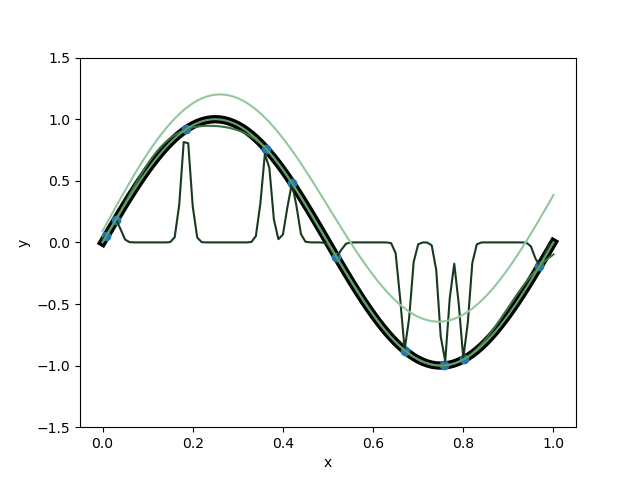

In [40]:
initwithoutnoise()

plt.figure()
cmap = sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.plot(xg, f(xg),color=cmap[0],lw=6)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

for i,ll in enumerate([0.01,.1,0.5,1]):
    def kernel(x1,x2):
        return np.exp(-(x1-x2)**2/(2*ll**2))
    
    G=np.asarray([[kernel(x1,x2) for x2 in xp] for x1 in xp])
    Ginv = np.linalg.inv(G)

    def fitf(x):
        return np.sum([kernel(x,xx)*a[i] for i,xx in enumerate(xp)])

    a = np.dot(Ginv,tp)

    fitg = [fitf(x) for x in xg]
    plt.plot(xg,fitg,color = cmap[i+1])
    plt.ylim(-1.5,1.5)
#plt.savefig('kernel_regression_without_noise.pdf')

#### Kernel regression with noise

[-0.07601861 -0.2101584  -0.08097567 -0.00075173 -0.17043608  0.0581404
 -0.09691441 -0.14809011 -0.05233425  0.12670646] <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


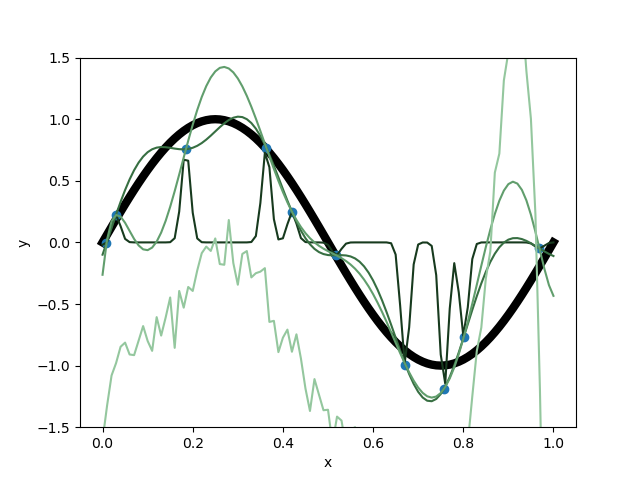

In [44]:
initwithnoise()
plt.figure()
cmap = sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.plot(xg, f(xg),color=cmap[0],lw=6)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')


for i,ll in enumerate([0.01,.1,0.5,1]):
    def kernel(x1,x2):
        return np.exp(-(x1-x2)**2/(2*ll**2))
    
    G=np.asarray([[kernel(x1,x2) for x2 in xp] for x1 in xp])
    Ginv = np.linalg.inv(G)

    def fitf(x):
        return np.sum([kernel(x,xx)*a[i] for i,xx in enumerate(xp)])

    a = np.dot(Ginv,tp)

    fitg = [fitf(x) for x in xg]
    plt.plot(xg,fitg,color = cmap[i+1])
    plt.ylim(-1.5,1.5)
#plt.savefig('kernel_regression_with_noise.pdf')

### Kernel ridge regression

[-0.07601861 -0.2101584  -0.08097567 -0.00075173 -0.17043608  0.0581404
 -0.09691441 -0.14809011 -0.05233425  0.12670646] <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


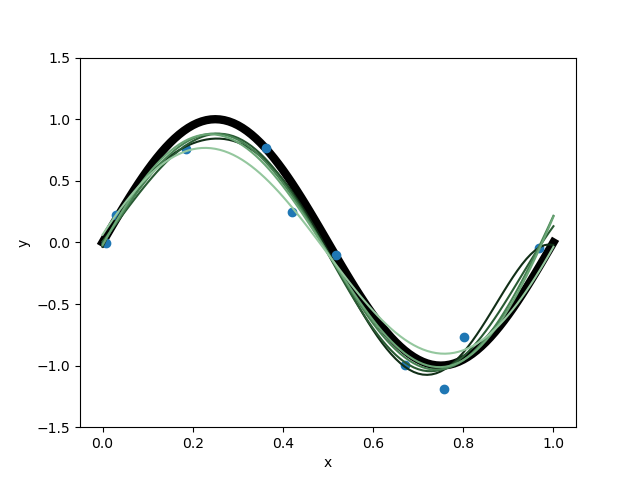

In [45]:
initwithnoise()
plt.figure()
cmap = sns.cubehelix_palette(6, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.plot(xg, f(xg),color=cmap[0],lw=6)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

quali = []

ll = 0.5

expos = [-6,-5,-4,-3,-2]
for i,expo in enumerate(expos):
    lprime = 10**expo
    def kernel(x1,x2):
        return np.exp(-(x1-x2)**2/(2*ll**2))
    
    G=np.asarray([[kernel(x1,x2) for x2 in xp] for x1 in xp])
    Ginv = np.linalg.inv(G+lprime*np.identity(N))

    def fitf(x):
        return np.sum([kernel(x,xx)*a[i] for i,xx in enumerate(xp)])

    a = np.dot(Ginv,tp)

    fitg = [fitf(x) for x in xg]
    plt.plot(xg,fitg,color = cmap[i+1])
    plt.ylim(-1.5,1.5)
    quali.append(sum((fitf(xg)-f(xg))**2)/len(xg))

#plt.savefig('kernel_ridge_regression_with_noise.pdf')

<IPython.core.display.Javascript object>


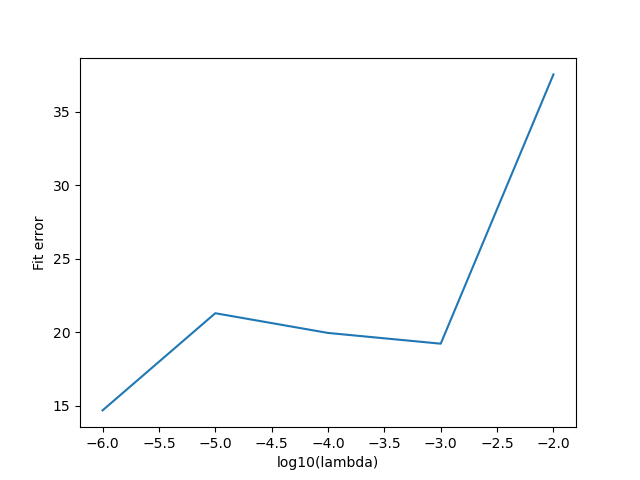

In [46]:
plt.figure()
plt.xlabel('log10(lambda)')
plt.ylabel('Fit error')
plt.plot(expos,quali)
#plt.savefig('kernel_regul.pdf')

[-0.07601861 -0.2101584  -0.08097567 -0.00075173 -0.17043608  0.0581404
 -0.09691441 -0.14809011 -0.05233425  0.12670646] <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


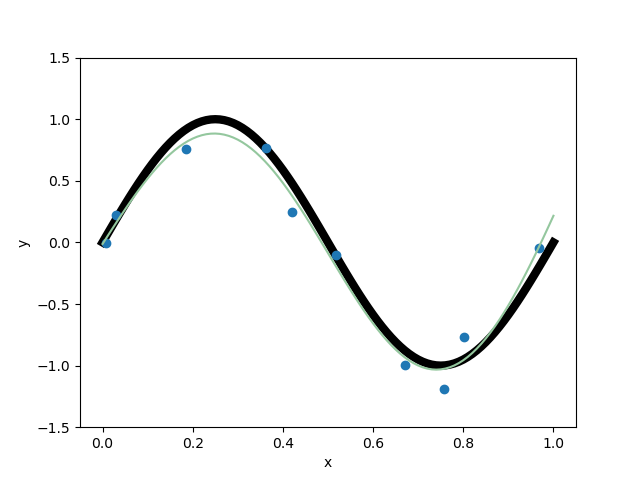

(-1.5, 1.5)

In [47]:
initwithnoise()

plt.figure()
cmap = sns.cubehelix_palette(2, start=2, rot=0, dark=0, light=.7, reverse=True)
plt.plot(xg, f(xg),color=cmap[0],lw=6)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

ll = 0.5

expo = -4
lprime = 10**expo
def kernel(x1,x2):
    return np.exp(-(x1-x2)**2/(2*ll**2))

G=np.asarray([[kernel(x1,x2) for x2 in xp] for x1 in xp])
Ginv = np.linalg.inv(G+lprime*np.identity(N))

def fitf(x):
    return np.sum([kernel(x,xx)*a[i] for i,xx in enumerate(xp)])

a = np.dot(Ginv,tp)

fitg = [fitf(x) for x in xg]
plt.plot(xg,fitg,color = cmap[1])
plt.ylim(-1.5,1.5)

#plt.savefig('kernel_best_fit.pdf')

### Gaussian process

#### Prior distribution with Gaussian kernel

[0.00860545 0.02965701 0.18487669 0.3632395  0.42018297 0.51828273
 0.6714843  0.75731199 0.80138126 0.96893621] <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


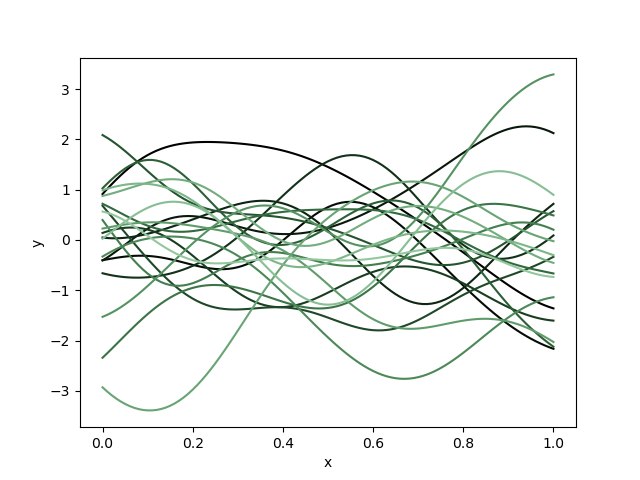

(101, 101)
(20, 101)


<IPython.core.display.Javascript object>


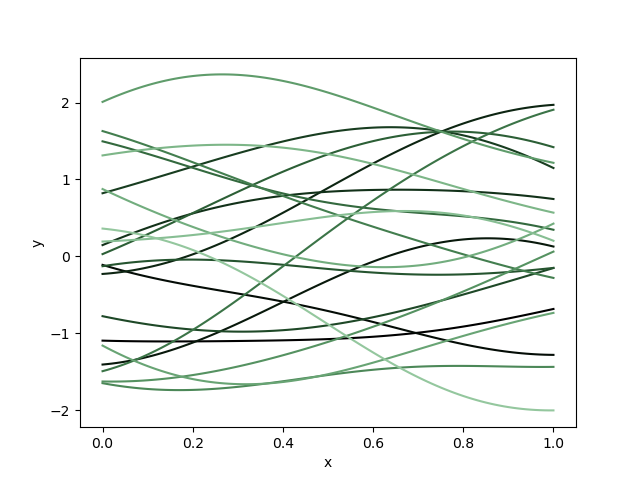

(101, 101)
(20, 101)


In [54]:
initwithoutnoise()

def kernel(x,xp):
    return np.exp(-(x-xp)**2/(2*ll**2))


for ll in [0.2,0.6]:
    funcnum = 20
    cmap = sns.cubehelix_palette(funcnum, start=2, rot=0, dark=0, light=.7, reverse=True)
    plt.figure()
    plt.xlabel('x')
    plt.ylabel('y')
    kk = np.array([[kernel(x,xp) for x in xg] for xp in xg ])
    print(kk.shape)
    yy = np.random.multivariate_normal(np.zeros(ngrid),kk,funcnum)
    print(yy.shape)
    for i,y in enumerate(yy):
        #print(i,y)
        plt.plot(xg,y,color = cmap[i])
    fname = 'prior_l_'+str(ll).replace('.','_')+'.pdf'
    #plt.savefig(fname)

### Gaussian process

[-0.07601861 -0.2101584  -0.08097567 -0.00075173 -0.17043608  0.0581404
 -0.09691441 -0.14809011 -0.05233425  0.12670646] <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


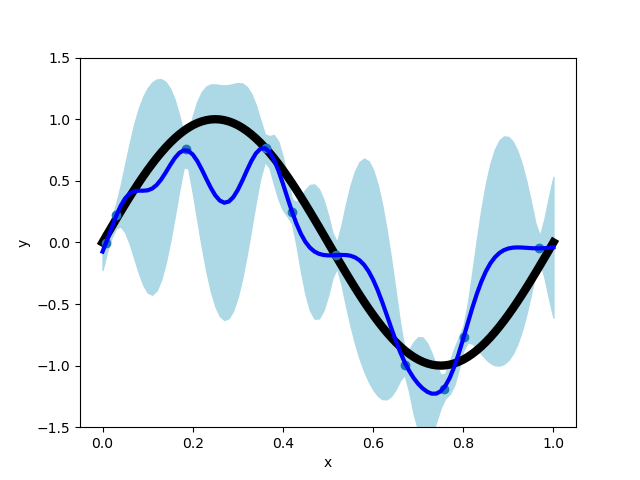

(10,)


<IPython.core.display.Javascript object>


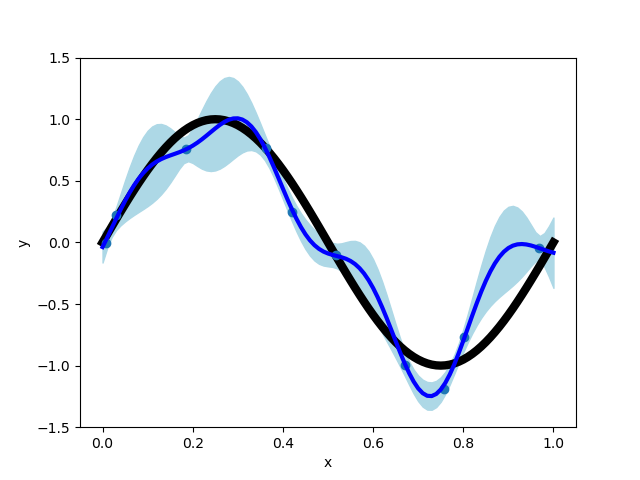

(10,)


<IPython.core.display.Javascript object>


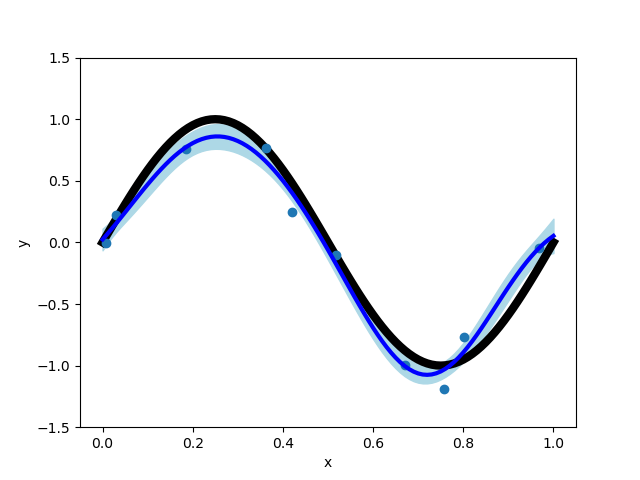

(10,)


<IPython.core.display.Javascript object>


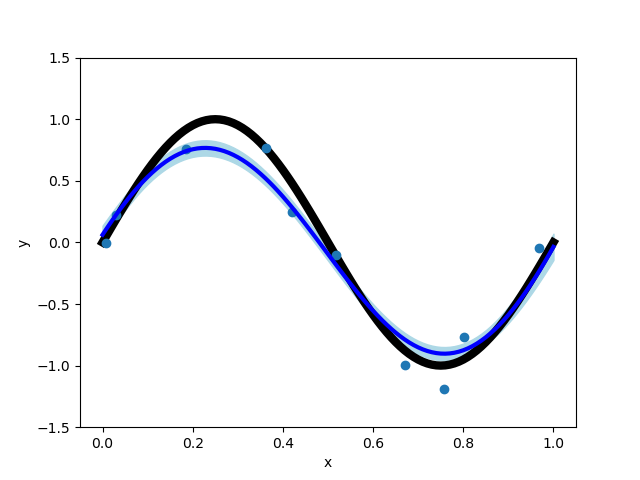

(10,)


In [57]:
initwithnoise()

def kernel(x,xpp):
    return k0*np.exp(-(x-xpp)**2/(2*ll**2))

def fitf(x):
    kv = np.array([kernel(x,xpp) for xpp in xp])
    return np.dot(kv,kkvec)

def varx(x):
    kv = np.array([kernel(x,xpp) for xpp in xp])
    return kernel(x,x)- np.dot(kv,np.dot(Cinv,kv))

k0 = 1
for ll in [0.05,0.1,0.2,0.5]:
    plt.figure()
    cmap = sns.cubehelix_palette(2, start=2, rot=0, dark=0, light=.7, reverse=True)
    plt.plot(xg, f(xg),color=cmap[0],lw=6)
    plt.plot(xp,tp,'o')
    plt.xlabel('x')
    plt.ylabel('y')


    K = np.array([[kernel(x,xpp) for x in xp] for xpp in xp])
    C = K + sigma**2*np.identity(N)
    Cinv = np.linalg.inv(C)
    #kkvec = np.linalg.solve(C,tp)
    kkvec = np.dot(Cinv, tp)
    print(np.shape(kkvec))    


    fitg = np.array([fitf(x) for x in xg])
    width = np.array([np.sqrt(varx(x)) for x in xg])
    plt.ylim(-1.5,1.5)

    plt.plot(xg, fitg, color='b', lw=3)
    plt.fill_between(xg, fitg-width, fitg+width, color='lightblue')
    fname = 'gp_'+str(ll).replace('.','_')+'.pdf'
    #plt.savefig(fname)

[-0.07601861 -0.2101584  -0.08097567 -0.00075173 -0.17043608  0.0581404
 -0.09691441 -0.14809011 -0.05233425  0.12670646] <class 'numpy.ndarray'>
(50, 50)


<IPython.core.display.Javascript object>


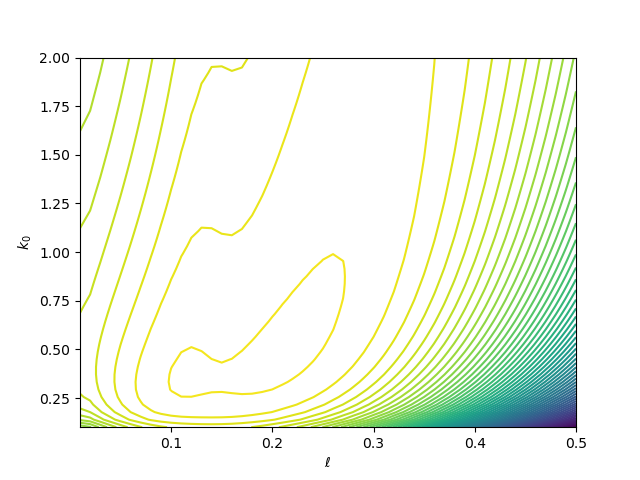

In [64]:
initwithnoise()

# Theta = (ll,k0)
def logP(theta):
    K = np.array([[theta[1]*np.exp(-(x-xpp)**2/(2*theta[0]**2))for x in xp] for xpp in xp])
    C = K + sigma**2*np.identity(N)
    Cinvtp =np.linalg.solve(C,tp)
    return -np.log(np.linalg.det(C))-np.dot(tp,Cinvtp)

llist = np.linspace(0.01,0.5,50)
k0list = np.linspace(0.1,2,50)

zz = [[logP([ll,k0]) for ll in llist] for k0 in k0list]
print(np.shape(zz))
    
xlist,ylist = np.meshgrid(llist,k0list)

plt.figure()
plt.xlabel('$\ell$')
plt.ylabel('$k_0$')
plt.contour(xlist,ylist,zz,60)
#plt.savefig('logP.pdf')

In [65]:
def mlogP(theta):
    return -logP(theta)

In [68]:
sp.optimize.minimize(mlogP,[.2,0.5],bounds=sp.optimize.Bounds([0,0],[1000,1000]))

      fun: -7.998982066984139
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.27897693e-05, -5.32907052e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 42
      nit: 10
     njev: 14
   status: 0
  success: True
        x: array([0.20905605, 0.46603957])